In [2]:
import pandas as pd
import os
from pandasai import SmartDataframe
from langchain_groq.chat_models import ChatGroq
import main.rag_with_docs.config as configurations


In [4]:
# Initializing our LLM Model - llama 3.1
llm = ChatGroq(model_name = 'llama3-70b-8192',api_key = configurations.groq_api_key)

In [3]:
# Reading data from multiple sheets of an excel file to a dictionary 
data_project = pd.read_excel("C:/Users/TarunSingh/Downloads/sample_test_data.xlsx",sheet_name =None)

In [6]:
# Naming each sheet's data as - "sheet_name+_+df" and storing those dataframes in "dfs" dictionary 
dfs={f"{sheet}_df" : dataframe for sheet,dataframe in data_project.items()}

In [8]:
# Printing one of our three Dataframes - Customers_df, Orders_df, and Payments_df
dfs['Payments_df']

,PaymentID,OrderID,PaymentMethod,PaymentDate
0,2001,1001,Paypal,2023-09-02
1,2002,1002,Credit Card,2023-09-03
2,2003,1003,Bank Transfer,2023-09-04
3,2004,1004,Credit Card,2023-09-05
4,2005,1005,Paypal,2023-09-06
5,2006,1006,Bank Transfer,2023-09-07
6,2007,1007,Credit Card,2023-09-08
7,2008,1008,Paypal,2023-09-09
8,2009,1009,Credit Card,2023-09-10
9,2010,1010,Bank Transfer,2023-09-11


In [9]:
# joining Customer_df and Orders_df
customers_orders_joined_df = pd.merge(dfs['Customers_df'], dfs['Orders_df'], on='CustomerID', how='inner')

In [10]:
customers_orders_joined_df

,CustomerID,CustomerName,Country,OrderID,OrderAmount,OrderDate
0,1,Michael Lee,Australia,1021,572,2023-09-21
1,2,Jennifer Cooper,Germany,1043,324,2023-10-13
2,3,Brian Young,USA,1027,135,2023-09-27
3,4,Angela Martinez,Canada,1007,949,2023-09-07
4,5,David Mitchell,USA,1002,401,2023-09-02
5,6,Lisa Taylor,Canada,1042,578,2023-10-12
6,7,Matthew White,UK,1020,230,2023-09-20
7,8,Michelle Harris,USA,1003,143,2023-09-03
8,9,William King,Germany,1039,309,2023-10-09
9,10,Laura Hernandez,Canada,1024,412,2023-09-24


In [11]:
# joining customers_orders_joined_df and Payments_df
customers_orders_payments_joined_df = pd.merge(customers_orders_joined_df, dfs['Payments_df'], on = 'OrderID')

In [12]:
customers_orders_payments_joined_df

,CustomerID,CustomerName,Country,OrderID,OrderAmount,OrderDate,PaymentID,PaymentMethod,PaymentDate
0,1,Michael Lee,Australia,1021,572,2023-09-21,2021,Paypal,2023-09-22
1,2,Jennifer Cooper,Germany,1043,324,2023-10-13,2043,Bank Transfer,2023-10-14
2,3,Brian Young,USA,1027,135,2023-09-27,2027,Paypal,2023-09-28
3,4,Angela Martinez,Canada,1007,949,2023-09-07,2007,Credit Card,2023-09-08
4,5,David Mitchell,USA,1002,401,2023-09-02,2002,Credit Card,2023-09-03
5,6,Lisa Taylor,Canada,1042,578,2023-10-12,2042,Paypal,2023-10-13
6,7,Matthew White,UK,1020,230,2023-09-20,2020,Credit Card,2023-09-21
7,8,Michelle Harris,USA,1003,143,2023-09-03,2003,Bank Transfer,2023-09-04
8,9,William King,Germany,1039,309,2023-10-09,2039,Paypal,2023-10-10
9,10,Laura Hernandez,Canada,1024,412,2023-09-24,2024,Paypal,2023-09-25


In [13]:
# converting our joined df into a smart_df so that we can have a chat with it
smart_df = SmartDataframe(customers_orders_payments_joined_df, config = {'llm':llm})

'c:/Users/TarunSingh/RAG/RAG_App/venv/exports/charts/temp_chart.png'

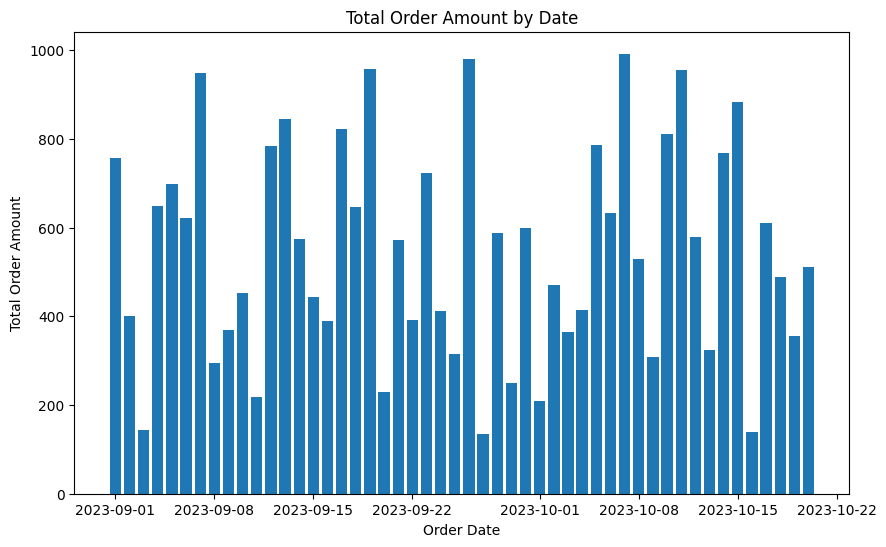

In [15]:
# chat with smart_df
smart_df.chat('can you give the total amount over different order dates without timestamp?')